In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

## Read in training data

In [6]:
TRAINING_DATASET = "tap_fun_train.csv"

In [7]:
training_df = pd.read_csv("./data/" + TRAINING_DATASET)

In [8]:
training_df.columns.values, len(training_df.columns.values)

(array(['user_id', 'register_time', 'wood_add_value', 'wood_reduce_value',
        'stone_add_value', 'stone_reduce_value', 'ivory_add_value',
        'ivory_reduce_value', 'meat_add_value', 'meat_reduce_value',
        'magic_add_value', 'magic_reduce_value', 'infantry_add_value',
        'infantry_reduce_value', 'cavalry_add_value',
        'cavalry_reduce_value', 'shaman_add_value', 'shaman_reduce_value',
        'wound_infantry_add_value', 'wound_infantry_reduce_value',
        'wound_cavalry_add_value', 'wound_cavalry_reduce_value',
        'wound_shaman_add_value', 'wound_shaman_reduce_value',
        'general_acceleration_add_value',
        'general_acceleration_reduce_value',
        'building_acceleration_add_value',
        'building_acceleration_reduce_value',
        'reaserch_acceleration_add_value',
        'reaserch_acceleration_reduce_value',
        'training_acceleration_add_value',
        'training_acceleration_reduce_value',
        'treatment_acceleraion_add_valu

In [9]:
training_df.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


## Check spender vs. non-spender by D45

In [ ]:
## Label spender and non-spender
training_df['spender_label'] = training_df.apply(
    lambda row: 'spender' if row['prediction_pay_price'] > 0 else 'non-spender',
    axis=1
)

In [ ]:
training_df.groupby('spender_label')['user_id'].agg('count')

## Plot histogram of spenders (for a specific spending range)

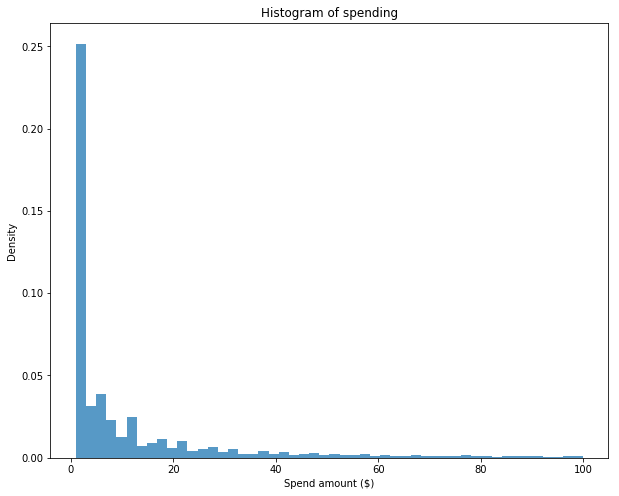

In [22]:
spend_lower = 0
spend_upper = 100

plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(training_df[(training_df['prediction_pay_price'] > spend_lower) 
                                        & (training_df['prediction_pay_price'] <= spend_upper)].prediction_pay_price, 
                            50, density=True, alpha=0.75)

plt.xlabel('Spend amount ($)')
plt.ylabel('Density')
plt.title('Histogram of spending')
plt.show()

## Predicting spender/non-spender 

### Getting data ready for TensorFlow

In [15]:
from tensorflow import keras

# Helper libraries
import numpy as np
from sklearn.model_selection import train_test_split

In [81]:
## Working with training data only
X_havespent = training_df.iloc[:,2:108]
y_havespent = (training_df.prediction_pay_price-training_df.pay_price>0) * 1

## Make train and test data sets
X, X_val, y, y_val = train_test_split(X_havespent, y_havespent, test_size=0.2, stratify=y_havespent)

In [82]:
len(X.values[0]), len(X.values[1])

(106, 106)

### Building the model

In [97]:

# model = keras.Sequential()
# model.add(keras.layers.Embedding(input_dim=106, output_dim=16, input_length = 1000))
# model.add(keras.layers.GlobalAveragePooling1D())
# model.add(keras.layers.Dense(16, activation=tf.nn.relu))
# model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model = keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(keras.layers.Dense(200, activation=tf.nn.relu))
# Add another:
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
# Add a softmax layer with 1 output units:
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))


In [98]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Traing the model

In [106]:
len(y_val.values)

457602

In [108]:
num_for_val = 300000

In [113]:
history = model.fit(X.values,
                    y.values,
                    epochs=3,
                    batch_size=1000,
                    validation_data=(X_val.values[:num_for_val], y_val.values[:num_for_val]),
                    verbose=1)

Train on 1830405 samples, validate on 300000 samples
Epoch 1/3
1830405/1830405 [==============================] - 18s 10us/step - loss: 0.1117 - acc: 0.9931 - val_loss: 0.1100 - val_acc: 0.9932
Epoch 2/3
1830405/1830405 [==============================] - 18s 10us/step - loss: 0.1117 - acc: 0.9931 - val_loss: 0.1100 - val_acc: 0.9932
Epoch 3/3
1830405/1830405 [==============================] - 18s 10us/step - loss: 0.1117 - acc: 0.9931 - val_loss: 0.1100 - val_acc: 0.9932


In [114]:
model.evaluate(X_val.values[num_for_val:], y_val.values[num_for_val:])

157602/157602 [==============================] - 3s 21us/step


[0.11495256074135715, 0.9928681108107765]

In [116]:
tf.metrics.false_negatives(
    y_val.values[num_for_val:],
    model.predict(X_val.values[num_for_val:])
)

(<tf.Tensor 'false_negatives/Identity:0' shape=() dtype=float32>,
 <tf.Tensor 'false_negatives/AssignAdd:0' shape=() dtype=float32_ref>)

In [125]:
a,b = tf.metrics.auc(
    y_val.values[num_for_val:],
    model.predict(X_val.values[num_for_val:])
)



AttributeError: 'Tensor' object has no attribute 'values'

### Playing with TF

In [27]:
## Get some sample data
n_samples = 400
data = np.asarray(training_df[training_df['pay_price'] > 0][['pay_price', 'prediction_pay_price']].head(n_samples))
data

array([[9.90000e-01, 9.90000e-01],
       [2.97000e+00, 4.96000e+00],
       [1.29700e+01, 1.29700e+01],
       [9.90000e-01, 9.90000e-01],
       [9.90000e-01, 9.90000e-01],
       [1.56880e+02, 1.66860e+02],
       [2.69400e+01, 2.69400e+01],
       [9.99000e+00, 9.99000e+00],
       [1.49800e+01, 1.99700e+01],
       [9.90000e-01, 9.90000e-01],
       [1.98000e+00, 1.98000e+00],
       [4.06870e+02, 8.98278e+03],
       [9.90000e-01, 9.90000e-01],
       [9.90000e-01, 9.90000e-01],
       [1.69600e+01, 1.69600e+01],
       [6.97000e+00, 8.96000e+00],
       [1.59700e+01, 1.59700e+01],
       [1.65910e+02, 1.85858e+03],
       [5.69300e+01, 1.67730e+02],
       [9.90000e-01, 9.90000e-01],
       [1.09700e+01, 1.09700e+01],
       [9.90000e-01, 1.98000e+00],
       [9.90000e-01, 9.90000e-01],
       [9.90000e-01, 9.90000e-01],
       [1.98000e+00, 1.98000e+00],
       [9.90000e-01, 9.90000e-01],
       [9.90000e-01, 9.90000e-01],
       [9.90000e-01, 5.98000e+00],
       [9.90000e-01,

In [47]:
## Create placeholders for input and output
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

## Create weight and bias, initialized to 0
weight = tf.Variable(0.0, name='weight')
bias = tf.Variable(0.0, name='bias')

## Build OLS model to predict Y using X
Y_predicted = X * weight + bias

## Use square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

## Using gradient descent with learning rate 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0000001).minimize(loss)

## Use a session to execute the model
with tf.Session() as sess:
    ## initialize necessary variables, i.e., weight and bias
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter("./graphs/my_graph_ols", sess.graph)
    
    ## train the model
    for i in range(100): ## train the model 100 times
        total_loss = 0.0
        for x,y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += l
        print("Epoch {0}: {1}".format(i, total_loss / n_samples))
        
    writer.close()
    
    w_value, b_value = sess.run([weight, bias])

Epoch 0: 275676.73572758044
Epoch 1: 189407.78923499238
Epoch 2: 178823.03794014783
Epoch 3: 177271.0337387673
Epoch 4: 176969.75261371926
Epoch 5: 176893.2367445381
Epoch 6: 176870.55740346602
Epoch 7: 176863.3360875909
Epoch 8: 176860.98519563547
Epoch 9: 176860.20544569372
Epoch 10: 176859.95277441284
Epoch 11: 176859.85302073442
Epoch 12: 176859.82904484094
Epoch 13: 176859.8231486518
Epoch 14: 176859.82968694597
Epoch 15: 176859.82871835263
Epoch 16: 176859.84083710238
Epoch 17: 176859.8422926227
Epoch 18: 176859.83902462042
Epoch 19: 176859.8350162927
Epoch 20: 176859.83615209
Epoch 21: 176859.83320608287
Epoch 22: 176859.82863013828
Epoch 23: 176859.8247672764
Epoch 24: 176859.83152151405
Epoch 25: 176859.83500154913
Epoch 26: 176859.83127006917
Epoch 27: 176859.8283197727
Epoch 28: 176859.83428470627
Epoch 29: 176859.8366975855
Epoch 30: 176859.8315738249
Epoch 31: 176859.82690379865
Epoch 32: 176859.8238004852
Epoch 33: 176859.8366114928
Epoch 34: 176859.83816320167
Epoch 35: 

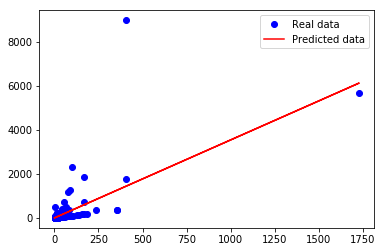

In [46]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label = 'Real data')
plt.plot(X, X * w_value + b_value, 'r', label = 'Predicted data')
plt.legend()
plt.show()